In [16]:
import numpy as np
import sympy as sym
from sympy import symbols, Eq, pprint, init_printing
import scipy.integrate
import matplotlib.pyplot as plt

from IPython.display import display
# from publish_format import *
sym.init_printing()

#### Cohesive network [PDS5, Wapl, Sororin, unloading]

In [17]:
## Rates for cohesive network 
rates_coh = sym.symbols("K_RP_RPW, K_RPW_RP, K_RP_RPS, K_RPS_RP, K_RP_R, K_R_RP, K_RPW_R_free")
K_RP_RPW, K_RPW_RP, K_RP_RPS, K_RPS_RP, K_RP_R, K_R_RP,  K_RPW_R_free = rates_coh

parameters_coh = sym.symbols("tau_S, F_S, N_S, tau_W, F_W, N_W, tau_P, F_P, N_P,  tau_R, F_R_sister, N_R")
tau_S, F_S, N_S, tau_W, F_W, N_W, tau_P, F_P, N_P, tau_R, F_R_sister, N_R = parameters_coh 

## Equations for cohesive network
rhs_coh = [K_RPW_R_free * N_W * F_W - F_R_sister*N_R/tau_R,                           # RAD21 unbinding  
        F_W/(tau_W * (1-F_W)) - K_RP_RPW * (F_P * N_P - F_S * N_S - F_W * N_W),       # Wapl binding 
        K_RPW_RP + K_RPW_R_free - 1/tau_W,                                            # Wapl unbinding  
        F_S/(tau_S * (1-F_S)) - K_RP_RPS * (F_P * N_P - F_S * N_S - F_W * N_W),           # Sororin binding
        K_RPS_RP - 1/tau_S,                                                               # Sororin unbinding
        F_P/(tau_P * (1-F_P)) - K_R_RP * (F_R_sister * N_R - F_P * N_P),        # PDS5 binding
        K_RPW_R_free * F_W *N_W + K_RP_R*(F_P * N_P - F_S * N_S - F_W * N_W) - F_P * N_P/tau_P,   # PDS5 unbinding  
]

## solutions cohesive network
sol_rates_coh = sym.solve(rhs_coh, rates_coh)

for i, eq in enumerate(rhs_coh, 1):
    pprint(Eq(symbols(f"eq_{i}"), eq))

        F_R_sister⋅N_R                       
eq₁ = - ────────────── + F_W⋅K_RPW_R_free⋅N_W
             τ_R                             
           F_W                                              
eq₂ = ───────────── - K_RP_RPW⋅(F_P⋅N_P - F_S⋅N_S - F_W⋅N_W)
      τ_W⋅(1 - F_W)                                         
                                 1 
eq₃ = K_RPW_RP + K_RPW_R_free - ───
                                τ_W
           F_S                                              
eq₄ = ───────────── - K_RP_RPS⋅(F_P⋅N_P - F_S⋅N_S - F_W⋅N_W)
      τ_S⋅(1 - F_S)                                         
                  1 
eq₅ = K_RPS_RP - ───
                 τ_S
           F_P                                          
eq₆ = ───────────── - K_R_RP⋅(-F_P⋅N_P + F_R_sister⋅N_R)
      τ_P⋅(1 - F_P)                                     
        F_P⋅N_P                                                              
eq₇ = - ─────── + F_W⋅K_RPW_R_free⋅N_W + K_RP_R⋅(F_P⋅N_P - F_S⋅N_S - F_W⋅N_W

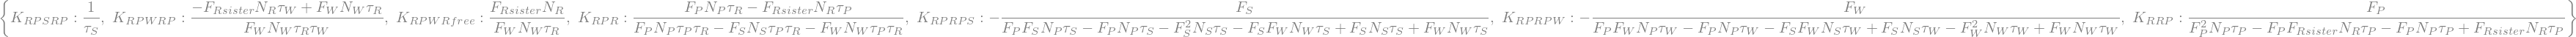

In [18]:
sol_rates_coh

#### Extrusive network [Nipbl, PDS5, Wapl, unloading]

In [19]:
## Rates for extrusive network 
rates_ext = sym.symbols("Kext_Rfree_RN, Kext_RN_R, Kext_R_RN, Kext_R_RP, Kext_RP_R, Kext_RP_RPW, Kext_RPW_RP, Kext_RPW_Rfree")
Kext_Rfree_RN, Kext_RN_R, Kext_R_RN, Kext_R_RP, Kext_RP_R, Kext_RP_RPW, Kext_RPW_RP, Kext_RPW_Rfree = rates_ext

parameters_ext = sym.symbols("tau_N_ext, F_N_ext, N_N_ext, tau_W_ext, F_W_ext, N_W_ext, tau_P_ext, F_P_ext, N_P_ext, tau_R_ext, F_R_ext, N_R_ext")
tau_N_ext, F_N_ext, N_N_ext, tau_W_ext, F_W_ext, N_W_ext, tau_P_ext, F_P_ext, N_P_ext, tau_R_ext, F_R_ext, N_R_ext = parameters_ext

## Equations for extrusive network 
rhs_ext = [ Kext_RN_R - 1 / tau_N_ext,                                           # NIPBL unbinding kinetics
        Kext_Rfree_RN * N_R_ext *(1-F_R_ext) + Kext_R_RN * (N_R_ext*F_R_ext - N_N_ext*F_N_ext - N_P_ext*F_P_ext) -  F_N_ext / tau_N_ext/ (1-F_N_ext), # NIPBL binding equilibrium
        Kext_RP_R * (N_P_ext * F_P_ext - N_W_ext * F_W_ext) + Kext_RPW_Rfree * N_W_ext * F_W_ext  - N_P_ext * F_P_ext/tau_P_ext, # PDS5 unbinding kinetics
        Kext_R_RP * (N_R_ext * F_R_ext - N_N_ext * F_N_ext - N_P_ext * F_P_ext)  - F_P_ext / tau_P_ext /(1-F_P_ext), # PDS5 binding equilibrium,
        Kext_RPW_RP + Kext_RPW_Rfree - 1 / tau_W_ext, # WAPL unbinding kinetics
        Kext_RP_RPW * (N_P_ext * F_P_ext - N_W_ext* F_W_ext)  - F_W_ext / tau_W_ext / (1-F_W_ext), # WAPL binding equilibrium
        Kext_RPW_Rfree * N_W_ext * F_W_ext - F_R_ext * N_R_ext / tau_R_ext,  # RAD21 unbinding kinetics
        Kext_Rfree_RN * N_N_ext * (1-F_N_ext) - F_R_ext / tau_R_ext / (1-F_R_ext) # RAD21 binding equilibrium, 
]

## Solutions extrusive network
sol_rates_ext = sym.solve(rhs_ext, rates_ext)
for i, eq in enumerate(rhs_ext, 1):
    pprint(Eq(symbols(f"eq_{i}"), eq))

                     1   
eq₁ = Kext_RN_R - ───────
                  τ_N_ext
               F_N_ext                                                        
eq₂ = - ───────────────────── + Kext_R_RN⋅(-F_N_ext⋅N_N_ext - F_P_ext⋅N_P_ext 
        τ_N_ext⋅(1 - F_N_ext)                                                 

                                                        
+ F_R_ext⋅N_R_ext) + Kext_Rfree_RN⋅N_R_ext⋅(1 - F_R_ext)
                                                        
        F_P_ext⋅N_P_ext                                                       
eq₃ = - ─────────────── + F_W_ext⋅Kext_RPW_Rfree⋅N_W_ext + Kext_RP_R⋅(F_P_ext⋅
            τ_P_ext                                                           

                          
N_P_ext - F_W_ext⋅N_W_ext)
                          
               F_P_ext                                                        
eq₄ = - ───────────────────── + Kext_R_RP⋅(-F_N_ext⋅N_N_ext - F_P_ext⋅N_P_ext 
        τ_P_ext⋅(1 - F_P_ext)       

In [9]:
### Get parameters cohesive network
def get_parameter_dict_coh(x, y):
    parameter_values_coh = [
        100.,               # tau_S
        0.52,               # F_S
        79770,              # N_S
        45.,                # tau_W
        x/(0.65+x),         # modified F_W for sister 
        69542*(0.65 + x),   # modified N_W for sister
        72,                 # tau_P
        y/(0.58 + y),       # modified F_P for sister
        180615*(0.58 + y),  # modified N_P for sister
        3600 * 20.,          # tau_R_sister, 20h 
        1/2,                # modified F_R_sister
        284470*2/3,         # modified N_R
    ]
    return dict(zip(parameters_coh, parameter_values_coh))

### Get parameters extrusive network
def get_parameter_dict_ext(x, y):
    parameter_values_ext = [
        72.,                  # tau_N
        0.4,                  # F_N
        119308,               # N_N
        45.,                  # tau_W
        (0.35-x)/(1-x),       # modified F_W for extrusive
        69542*(1-x),          # modified N_W for extrusive
        72,                   # tau_P
        (0.42 - y)/(1-y),     # modified F_P for extrusive
        180615*(1-y),         # modified N_P for extrusive
        822.,                 # tau_R_extrusive
        1/2,                  # modified F_R_sister
        284470*2/3,           # modified N_R
    ]
    return dict(zip(parameters_ext, parameter_values_ext))

# Define a function to check if the solutions are positive for cohesive network
def check_positive_solutions_coh(x, y):
    parameter_dict = get_parameter_dict_coh(x, y)
    # Evaluate each rate and check if it's positive and non-zero
    rates = []
    for s in sol_rates_coh.items():
        rate = s[1].evalf(subs=parameter_dict)
        rates.append(rate)
        if rate.is_positive is not True: 
            return False, rates
    return True, rates  #

# Define a function to check if the solutions are positive for extrusive network
def check_positive_solutions_ext(x, y):
    parameter_dict_ext = get_parameter_dict_ext(x, y)
    # Evaluate each rate and check if it's positive and non-zero
    rates = []
    for s in sol_rates_ext.items():
        rate = s[1].evalf(subs = parameter_dict_ext)
        rates.append(rate)
        if rate.is_positive is not True: 
            return False, rates
    return True, rates 

In [10]:
# Create a grid of x and y values
## x is the fraction of Wapl bounded at sisterCs which is betwwen 0 and 0.35
## y is the fraction of PDS5 bounded at sisterCs which is between 0 and 0.42
## z is the fraction of Nipbl bounded at sisterCs which is between 0 and 0.40
# Example of vectorized logic (requires rewriting the functions)
from joblib import Parallel, delayed

def process_point(x, y):
    indicator_coh, rates_coh = check_positive_solutions_coh(x, y)
    indicator_ext, rates_ext = check_positive_solutions_ext(x, y)
    if indicator_coh and indicator_ext:
        return (x, y, rates_coh, rates_ext)
    return None

# Define your value ranges
x_values = np.linspace(1e-11, 0.345, 100)
y_values = np.linspace(1e-11, 0.415, 100)

# Create a full 3D grid of combinations
x_grid, y_grid = np.meshgrid(x_values, y_values, indexing='ij')
# Flatten the meshgrid to list of points
points = list(zip(x_grid.ravel(), y_grid.ravel()))
# Process all points in parallel
results = Parallel(n_jobs=-1, backend='loky')(delayed(process_point)(x, y) for x, y in points)

# Filter out None results
positive_xyz_scan = [r for r in results if r is not None]

Centroid coordinates:
X: 0.1364
Y: 0.3094


/var/folders/lx/fhbfjbg11w929k0p_rgg61ch0000gn/T/ipykernel_74158/1443347462.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_vals, y_vals, cmap='viridis', s=10)


Text(0.5, 0.92, 'Average Holtzmann/Bekker + Ding G2 180615 Change On')

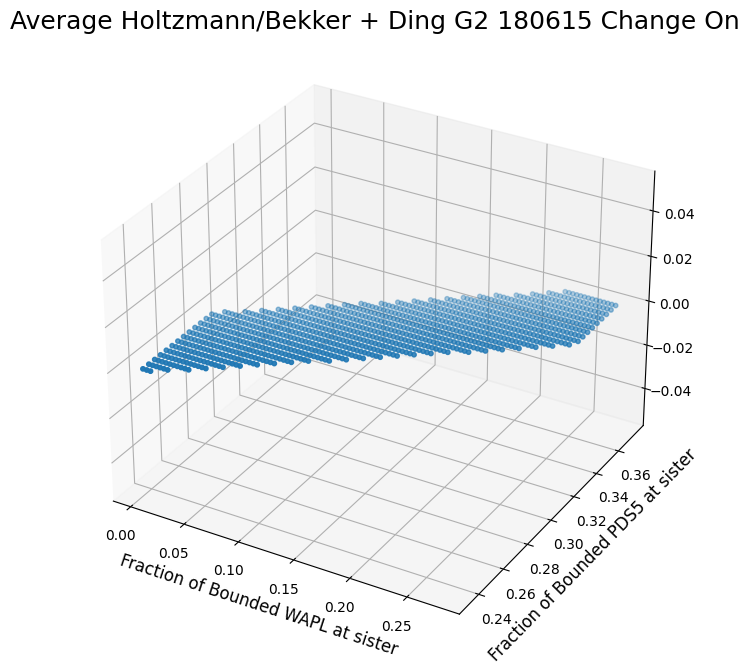

In [20]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Extract x, y, z values from positive results
x_vals = [point[0] for point in positive_xyz_scan]
y_vals = [point[1] for point in positive_xyz_scan]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_vals, y_vals, cmap='viridis', s=10)

# Calculate the centroid
centroid_x = np.mean(x_vals)
centroid_y = np.mean(y_vals)

print(f"Centroid coordinates:")
print(f"X: {centroid_x:.4f}")
print(f"Y: {centroid_y:.4f}")

# Set axis labels and appearance
ax.set_xlabel("Fraction of Bounded WAPL at sister", fontsize=12)
ax.set_ylabel("Fraction of Bounded PDS5 at sister", fontsize=12)

ax.set_title("Average Holtzmann/Bekker + Ding G2 180615 Change On", fontsize=18)

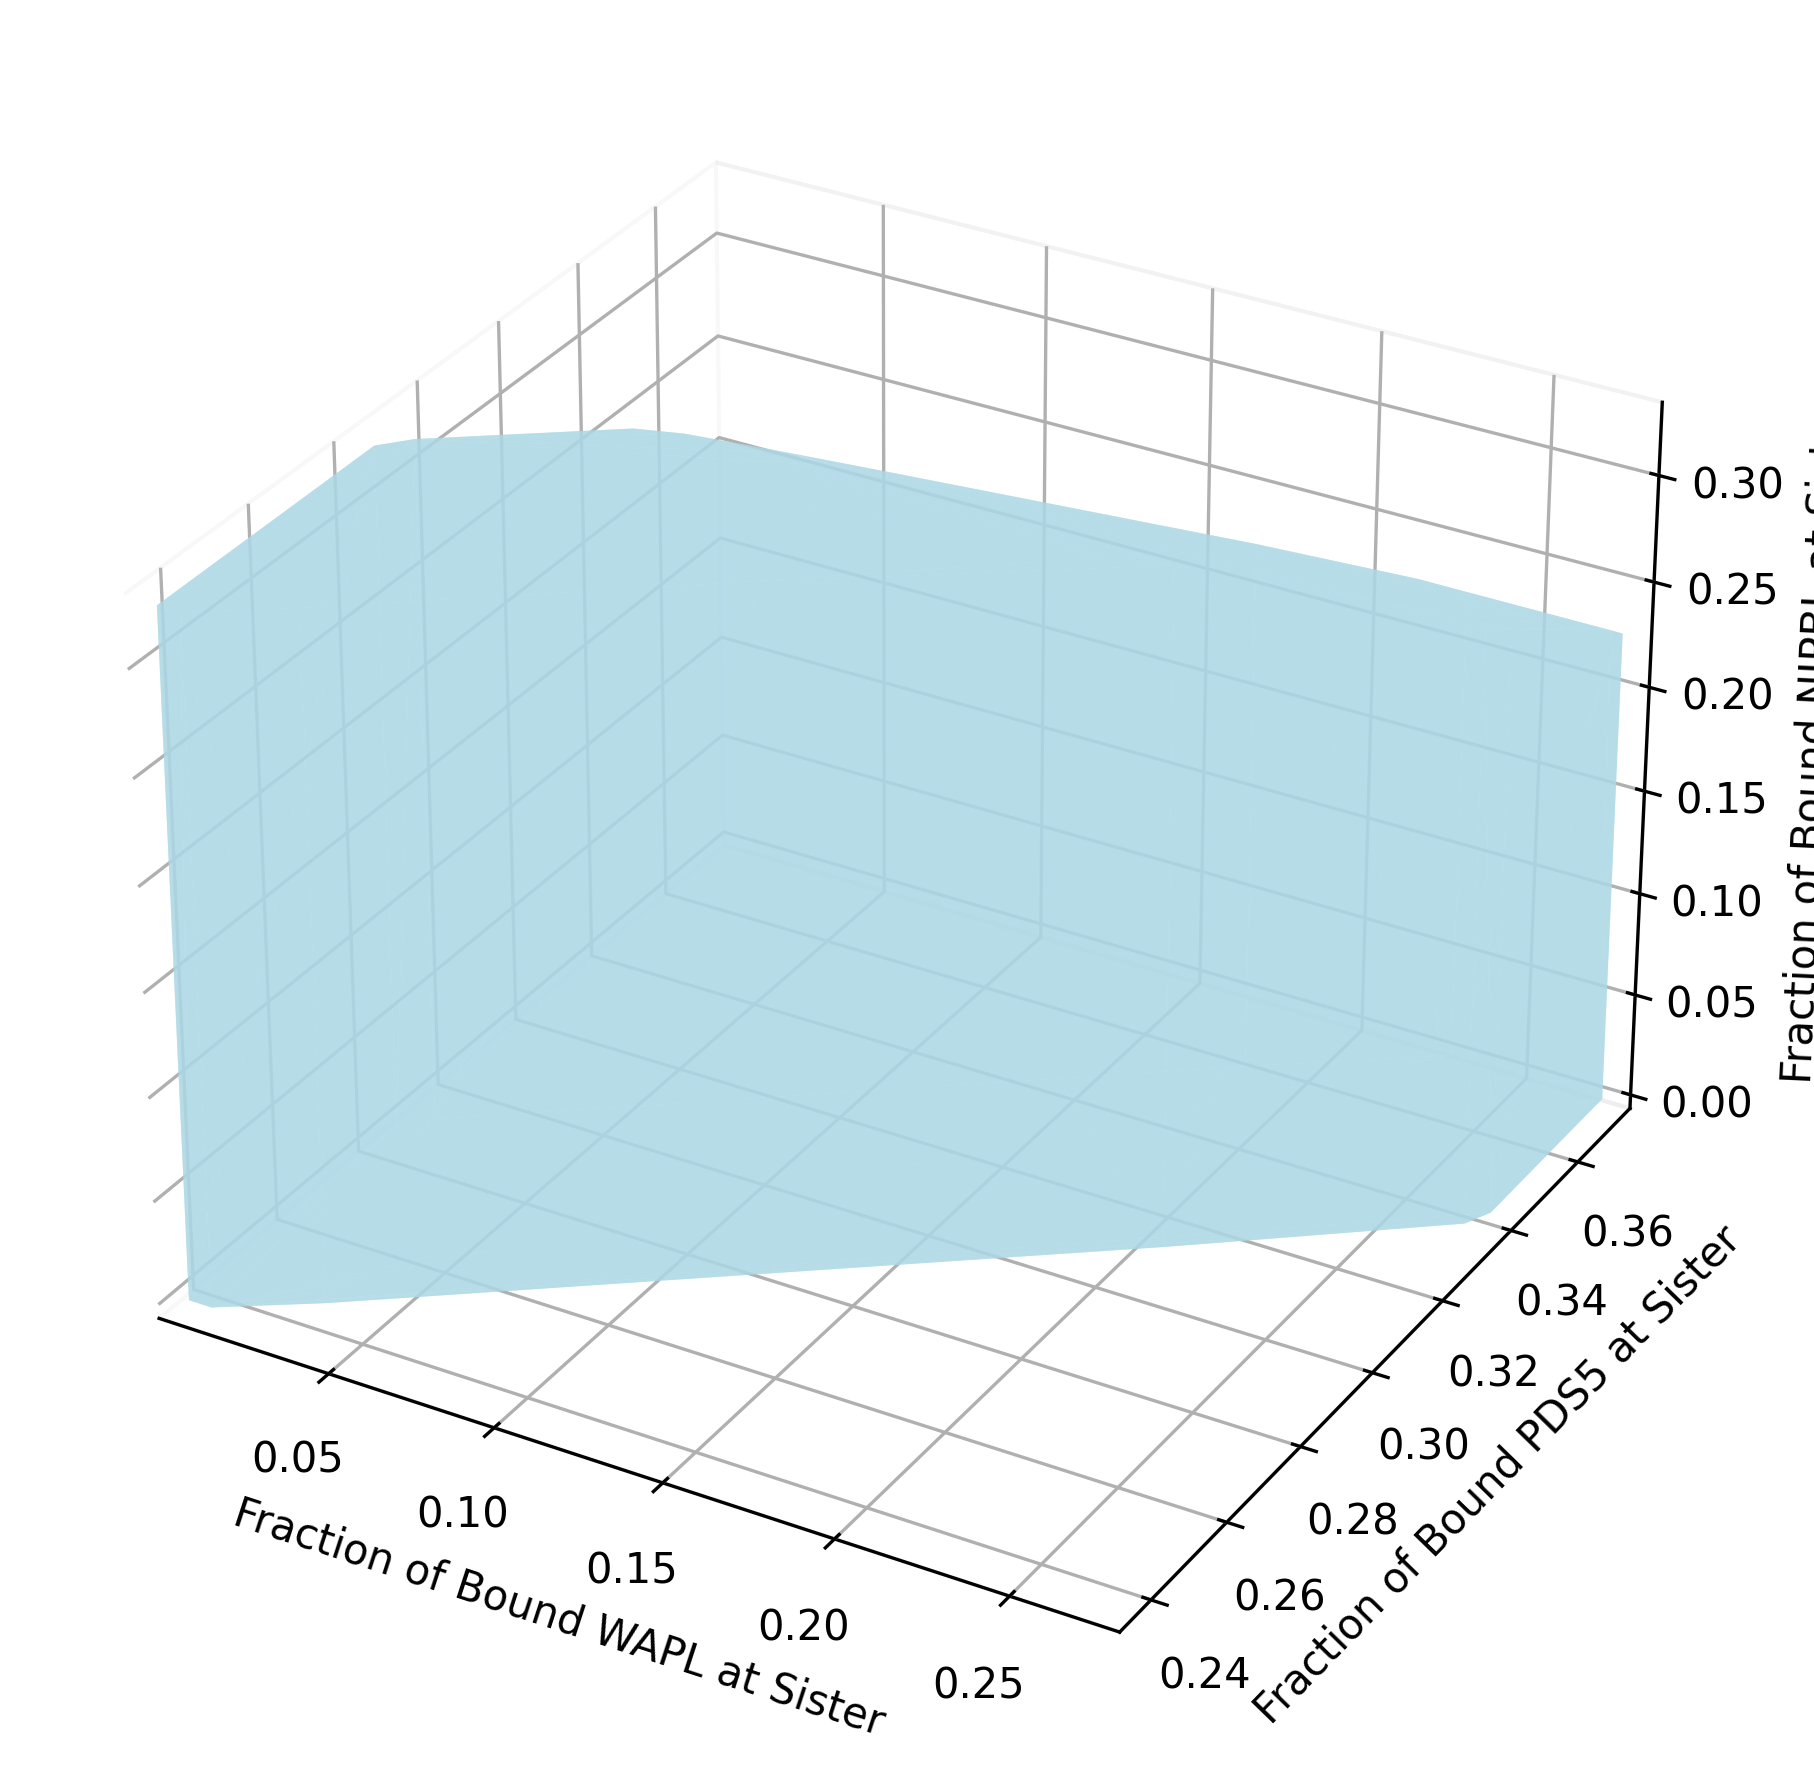

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

def plot_feasible_region(x_vals, y_vals, z_vals):
    
    # Convert to numpy arrays if needed
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    z_vals = np.array(z_vals)
    
    # Create figure
    fig = plt.figure(figsize=(8, 6), dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    
    # Create convex hull (boundary of feasible region)
    points = np.column_stack([x_vals, y_vals, z_vals])
    hull = ConvexHull(points)
    
    # Create 3D mesh from hull faces
    faces = []
    for simplex in hull.simplices:
        faces.append([points[simplex[j]] for j in range(len(simplex))])
    
    # Plot the hull surface using Poly3DCollection
    mesh = Poly3DCollection(faces, alpha=0.65, facecolor='lightblue', 
                           edgecolor='darkblue', linewidth=0)
    ax.add_collection3d(mesh)
    
    # Add some sample points for reference
    # sample_size = min(500, len(x_vals))
    # if sample_size > 0:
    #    indices = np.random.choice(len(x_vals), sample_size, replace=False)
    #    ax.scatter(x_vals[indices], y_vals[indices], z_vals[indices], 
    #              c='red', s=8, alpha=0.6, label='Sample points')
    
    # Set the aspect ratio and limits
    ax.set_xlim(x_vals.min(), x_vals.max())
    ax.set_ylim(y_vals.min(), y_vals.max())
    ax.set_zlim(z_vals.min(), z_vals.max())
    
    # Labels and styling
    ax.set_xlabel('Fraction of Bound WAPL at Sister', fontsize=10)
    ax.set_ylabel('Fraction of Bound PDS5 at Sister', fontsize=10)
    ax.set_zlabel('Fraction of Bound NIPBL at Sister', fontsize=10)
    # ax.set_title('Feasible Parameter Region', fontsize=16)
    
    # Clean appearance
    # ax.grid(True, alpha=0.3)
    # ax.view_init(elev=20, azim=45)
    # Remove pane backgrounds for cleaner look
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    plt.tight_layout()
    return fig

# Usage: 
fig = plot_feasible_region(x_vals, y_vals, z_vals)

# Save as SVG
plt.savefig('feasible_region.svg', format='svg', bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Also save as high-quality PNG for backup
plt.savefig('feasible_region.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

In [23]:
result = process_point(centroid_x, centroid_y, centroid_z)

In [24]:
x, y, z, rates_coh, rates_ext = result

In [25]:
print("\nCohesive Network Fitted Rates:")
for (symbol, _), value in zip(sol_rates_coh.items(), rates_coh):
    print(f"{symbol}: {value}")


Cohesive Network Fitted Rates:
K_RPW_RP: 0.0217342850247836
K_RP_R: 0.135283251567350
K_RPW_R_free: 0.000487937197438578
K_R_RN: 1.63788627652547E-7
K_RN_R: 0.0138888888888889
K_RP_RPW: 7.70702140177632E-7
K_RP_RPS: 0.00000188766176353228
K_RPS_RP: 0.0100000000000000
K_R_RP: 3.56031150450380E-7


In [26]:
print("\nExtrusive Network Fitted Rates:")
for (symbol, _), value in zip(sol_rates_ext.items(), rates_ext):
    print(f"{symbol}: {value}")


Extrusive Network Fitted Rates:
Kext_RN_R: 0.0138888888888889
Kext_Rfree_RN: 1.69944598876500E-8
Kext_R_RN: 9.34832352390104E-8
Kext_RP_R: 0.0366225988670575
Kext_RPW_RP: 0.0147035439575235
Kext_RPW_Rfree: 0.00751867826469871
Kext_R_RP: 5.77027124650159E-8
Kext_RP_RPW: 0.00000175446001998080
